In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Zepp-data.csv')
df.head()

,club,club_speed,club_plan,hand_plan,tempo,angle,date
0,7,75,-3,3,2.7,286,08/06/2017
1,7,71,-1,6,3.1,281,08/06/2017
2,7,75,6,8,3.2,284,08/06/2017
3,7,58,5,6,3.2,280,08/06/2017
4,1,61,50,12,1.8,182,09/06/2017


In [3]:
df.describe()

,club_speed,club_plan,hand_plan,tempo,angle
count,109.000000,109.000000,109.000000,109.000000,109.000000
mean,84.559633,2.715596,4.788991,3.300000,269.761468
std,11.747680,17.363804,9.655236,2.629357,23.912223
min,51.000000,-50.000000,-35.000000,1.700000,162.000000
25%,79.000000,-4.000000,1.000000,2.800000,264.000000
50%,86.000000,4.000000,5.000000,3.100000,275.000000
75%,92.000000,12.000000,9.000000,3.400000,284.000000
max,102.000000,50.000000,45.000000,30.000000,303.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   club        109 non-null    object 
 1   club_speed  109 non-null    int64  
 2   club_plan   109 non-null    int64  
 3   hand_plan   109 non-null    int64  
 4   tempo       109 non-null    float64
 5   angle       109 non-null    int64  
 6   date        109 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.1+ KB


In [5]:
df['speed_tempo_ratio'] = df['club_speed'] / df['tempo']

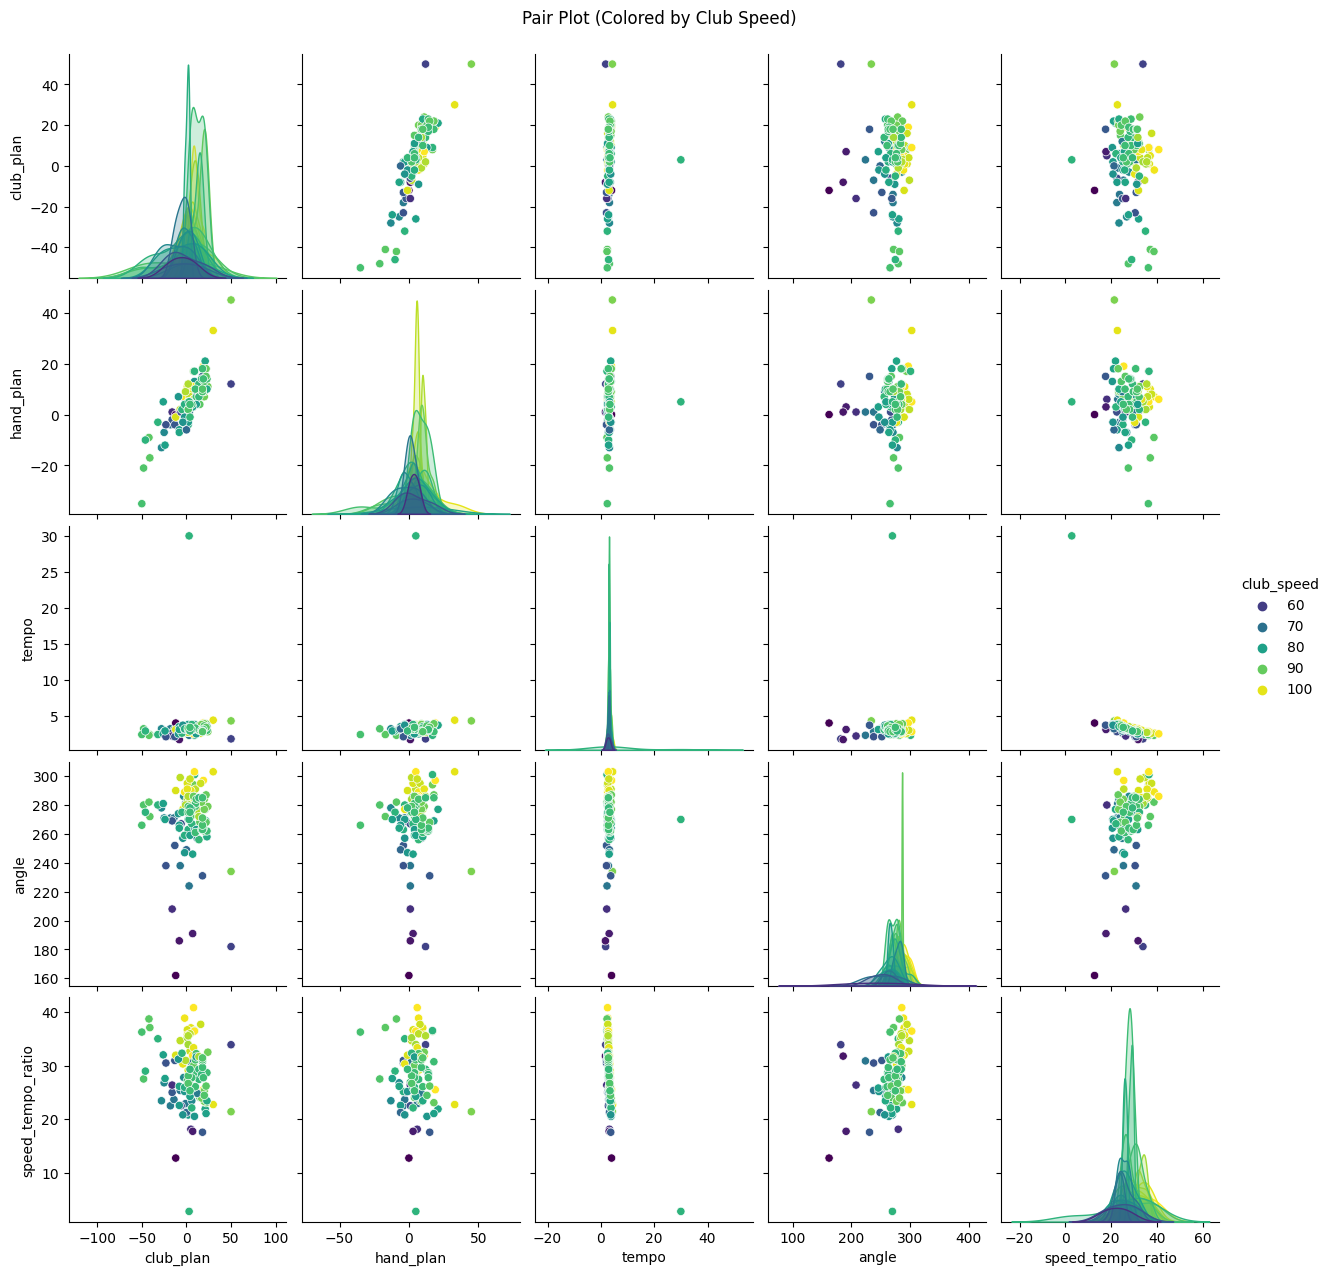

In [6]:
sns.pairplot(df, hue="club_speed", palette="viridis")
plt.suptitle("Pair Plot (Colored by Club Speed)", y=1.02)
plt.show()

/var/folders/vc/prq7ffv51gl630xh6bmjgj700000gp/T/ipykernel_90909/860672174.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 2, 2, polar=True)


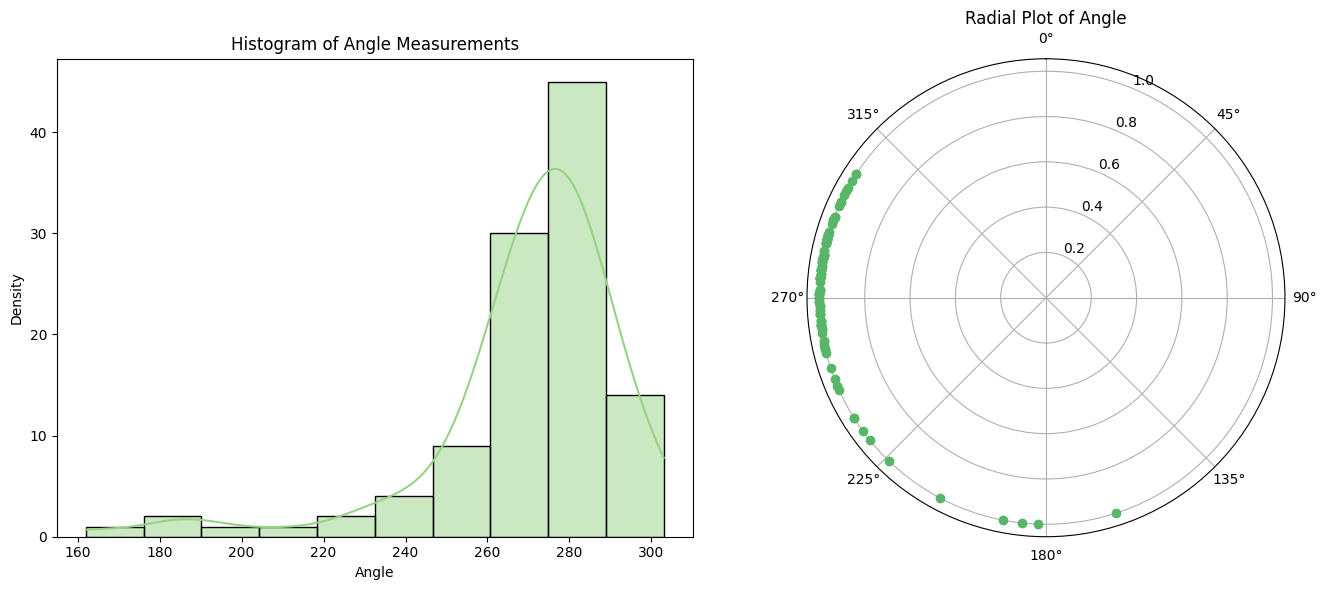

In [7]:
# Set a green color palette
green_palette = sns.color_palette("YlGn")

# Create a combined figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Histogram of "angle" with Green Palette (left subplot)
sns.histplot(data=df, x="angle", bins=10, color=green_palette[2], kde=True, ax=axes[0])
axes[0].set_xlabel('Angle')
axes[0].set_ylabel('Density')
axes[0].set_title('Histogram of Angle Measurements')

# Plot 2: Radial Plot of "angle" with Green Palette (right subplot)
ax = plt.subplot(1, 2, 2, polar=True)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.plot(df['angle'] * (2 * 3.1416 / 360), [1] * len(df), 'o', color=green_palette[3])
ax.set_title('Radial Plot of Angle')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined figure with both subplots
plt.show()

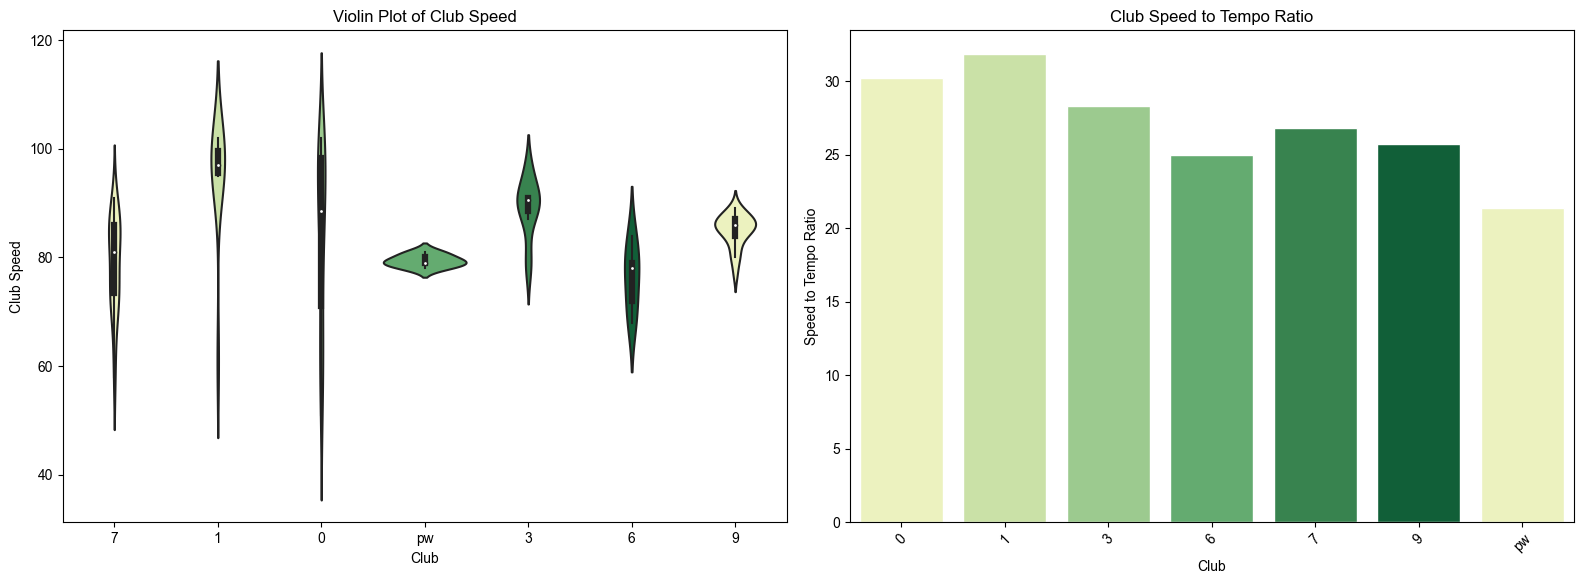

In [8]:
# Set a green color palette
green_palette = sns.color_palette("YlGn")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Violin Plot with Green Palette
sns.violinplot(x='club', y='club_speed', data=df, ax=axes[0], palette=green_palette)
axes[0].set_xlabel('Club')
axes[0].set_ylabel('Club Speed')
axes[0].set_title('Violin Plot of Club Speed')

# Plot 2: Bar Plot with Green Palette
sns.set(style="whitegrid")
grouped = df.groupby('club')['speed_tempo_ratio'].mean().reset_index()
sns.barplot(x='club', y='speed_tempo_ratio', data=grouped, ax=axes[1], palette=green_palette)
axes[1].set_title('Club Speed to Tempo Ratio')
axes[1].set_xlabel('Club')
axes[1].set_ylabel('Speed to Tempo Ratio')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

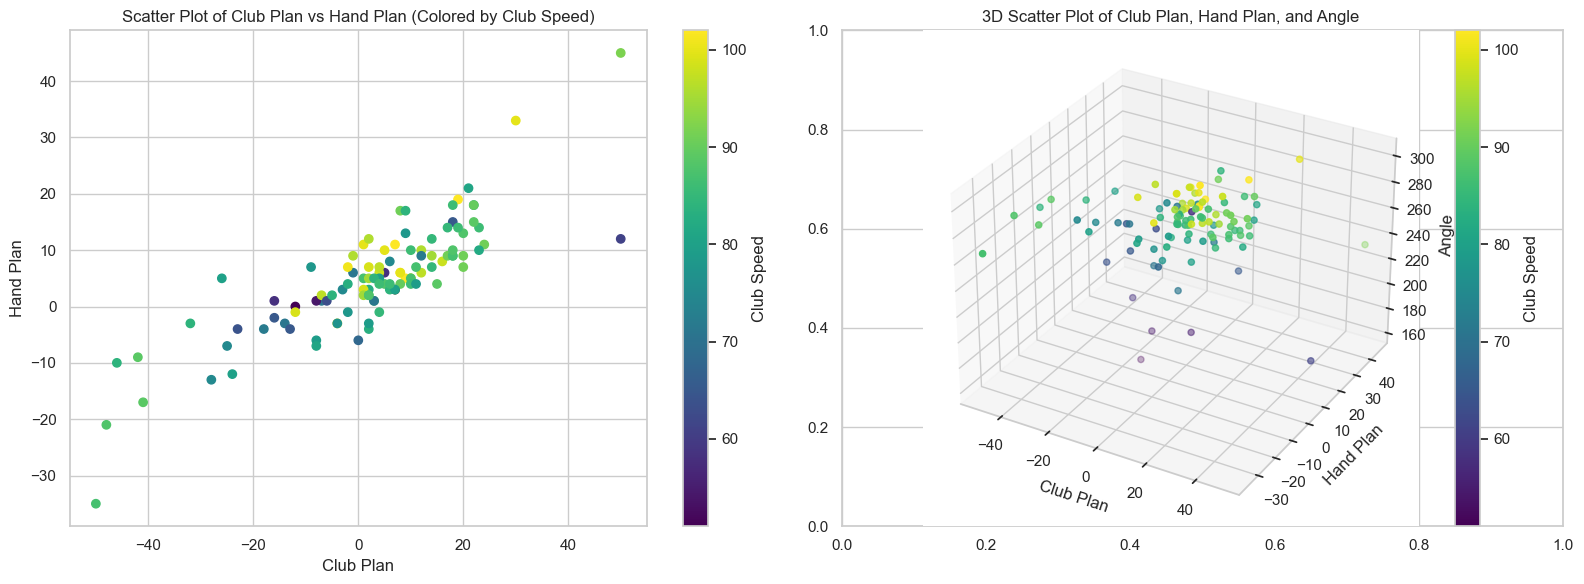

In [9]:
# Create a combined figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Scatter Plot with Colorbar (left subplot)
scatter = axes[0].scatter(df["club_plan"], df["hand_plan"], c=df["club_speed"], cmap="viridis")
axes[0].set_xlabel("Club Plan")
axes[0].set_ylabel("Hand Plan")
axes[0].set_title("Scatter Plot of Club Plan vs Hand Plan (Colored by Club Speed)")
cbar1 = plt.colorbar(scatter, ax=axes[0])
cbar1.set_label("Club Speed")

# Plot 2: 3D Scatter Plot with Colorbar (right subplot)
ax = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax.scatter(df["club_plan"], df["hand_plan"], df["angle"], c=df["club_speed"], cmap="viridis")
ax.set_xlabel("Club Plan")
ax.set_ylabel("Hand Plan")
ax.set_zlabel("Angle")
ax.set_title("3D Scatter Plot of Club Plan, Hand Plan, and Angle")
cbar2 = plt.colorbar(scatter2, ax=ax)
cbar2.set_label("Club Speed")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined figure with both subplots
plt.show()

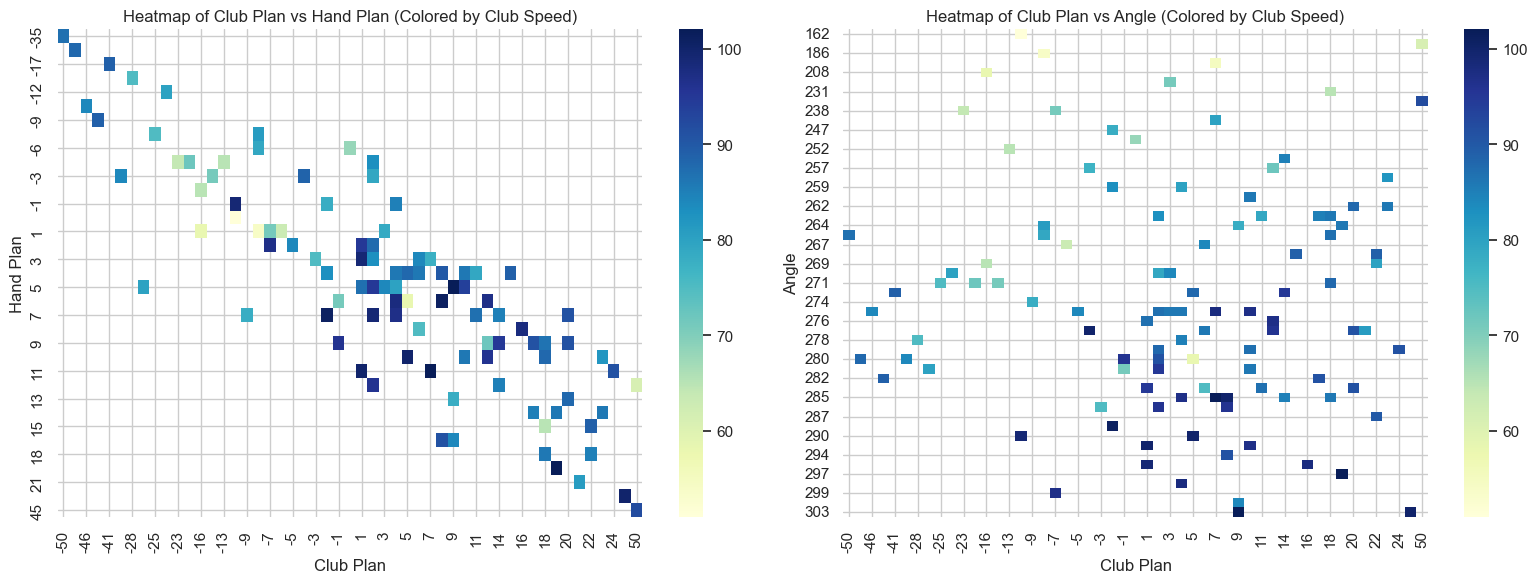

In [10]:
# Create a combined figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Heatmap of Club Plan vs Hand Plan (left subplot)
pivot_table1 = df.pivot_table(index="hand_plan", columns="club_plan", values="club_speed", aggfunc="mean")
sns.heatmap(pivot_table1, cmap="YlGnBu", annot=False, fmt=".1f", ax=axes[0])
axes[0].set_xlabel("Club Plan")
axes[0].set_ylabel("Hand Plan")
axes[0].set_title("Heatmap of Club Plan vs Hand Plan (Colored by Club Speed)")

# Plot 2: Heatmap of Club Plan vs Angle (right subplot)
pivot_table2 = df.pivot_table(index="angle", columns="club_plan", values="club_speed", aggfunc="mean")
sns.heatmap(pivot_table2, cmap="YlGnBu", annot=False, fmt=".1f", ax=axes[1])
axes[1].set_xlabel("Club Plan")
axes[1].set_ylabel("Angle")
axes[1].set_title("Heatmap of Club Plan vs Angle (Colored by Club Speed)")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the combined figure with both subplots
plt.show()